In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow and GPU
print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ GPU available: {tf.config.list_physical_devices('GPU')}")
print(f"✅ NumPy version: {np.__version__}")

print("\n🎉 Your environment is ready!")

✅ TensorFlow version: 2.19.0
✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ NumPy version: 2.0.2

🎉 Your environment is ready!


In [3]:
# Upload your kaggle.json file
from google.colab import files

print("👇 Click the 'Choose Files' button below and select your kaggle.json file:")
uploaded = files.upload()

👇 Click the 'Choose Files' button below and select your kaggle.json file:


Saving kaggle.json to kaggle.json


In [4]:
# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

print("✅ Kaggle is connected and ready!")


✅ Kaggle is connected and ready!


In [5]:
# Download the Chest X-Ray Pneumonia dataset
print("📥 Downloading dataset... (this takes 2-3 minutes)")
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

print("\n📦 Extracting files...")
!unzip -q chest-xray-pneumonia.zip

print("\n✅ Dataset downloaded successfully!")
print("\n📁 Let's see what folders we have:")
!ls chest_xray

📥 Downloading dataset... (this takes 2-3 minutes)
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:28<00:00, 43.0MB/s]
100% 2.29G/2.29G [00:28<00:00, 87.9MB/s]

📦 Extracting files...

✅ Dataset downloaded successfully!

📁 Let's see what folders we have:
chest_xray  __MACOSX  test  train  val


In [6]:
import os
from PIL import Image

# Count images in each category
base_dir = 'chest_xray'
train_normal = len(os.listdir('chest_xray/train/NORMAL'))
train_pneumonia = len(os.listdir('chest_xray/train/PNEUMONIA'))
test_normal = len(os.listdir('chest_xray/test/NORMAL'))
test_pneumonia = len(os.listdir('chest_xray/test/PNEUMONIA'))

print("=" * 50)
print("📊 DATASET SUMMARY")
print("=" * 50)
print(f"\n🏋️ TRAINING SET:")
print(f"   Normal X-rays: {train_normal}")
print(f"   Pneumonia X-rays: {train_pneumonia}")
print(f"   Total: {train_normal + train_pneumonia}")

print(f"\n🧪 TEST SET:")
print(f"   Normal X-rays: {test_normal}")
print(f"   Pneumonia X-rays: {test_pneumonia}")
print(f"   Total: {test_normal + test_pneumonia}")

print(f"\n📦 GRAND TOTAL: {train_normal + train_pneumonia + test_normal + test_pneumonia} images")
print("=" * 50)

📊 DATASET SUMMARY

🏋️ TRAINING SET:
   Normal X-rays: 1341
   Pneumonia X-rays: 3875
   Total: 5216

🧪 TEST SET:
   Normal X-rays: 234
   Pneumonia X-rays: 390
   Total: 624

📦 GRAND TOTAL: 5840 images


Loading NORMAL X-ray samples...
Loading PNEUMONIA X-ray samples...


/tmp/ipython-input-903499036.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


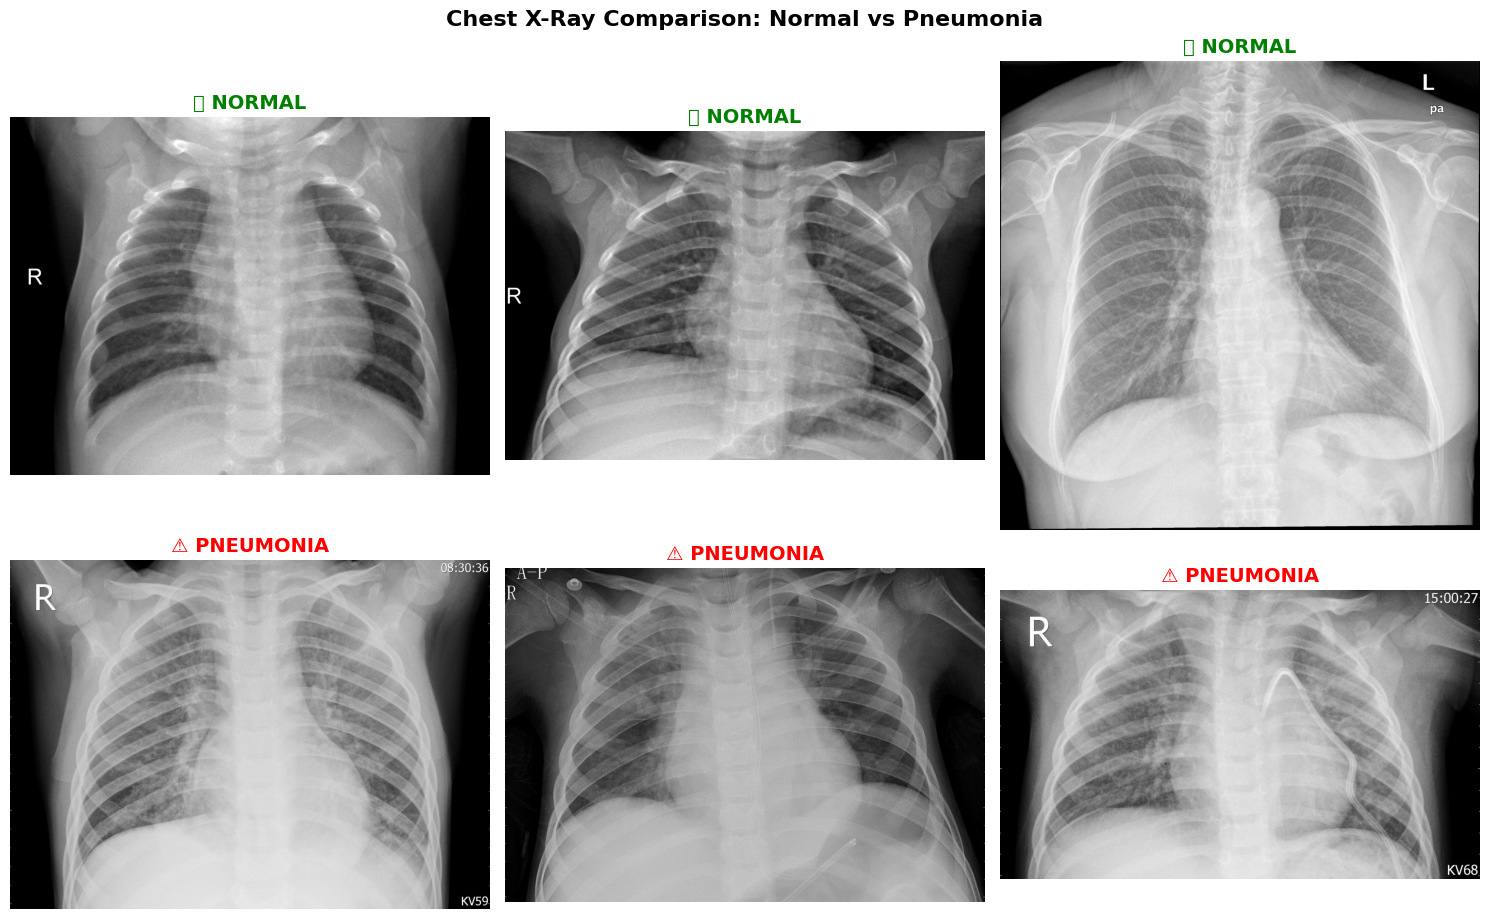


👀 OBSERVATIONS:
- Normal lungs: Darker, clearer areas
- Pneumonia lungs: White/cloudy patches (fluid/infection)


In [7]:
import matplotlib.pyplot as plt

# Display sample X-ray images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show 3 NORMAL X-rays
print("Loading NORMAL X-ray samples...")
normal_files = os.listdir('chest_xray/train/NORMAL')[:3]
for i, img_file in enumerate(normal_files):
    img_path = os.path.join('chest_xray/train/NORMAL', img_file)
    img = Image.open(img_path)
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title('✅ NORMAL', fontsize=14, fontweight='bold', color='green')
    axes[0, i].axis('off')

# Show 3 PNEUMONIA X-rays
print("Loading PNEUMONIA X-ray samples...")
pneumonia_files = os.listdir('chest_xray/train/PNEUMONIA')[:3]
for i, img_file in enumerate(pneumonia_files):
    img_path = os.path.join('chest_xray/train/PNEUMONIA', img_file)
    img = Image.open(img_path)
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title('⚠️ PNEUMONIA', fontsize=14, fontweight='bold', color='red')
    axes[1, i].axis('off')

plt.suptitle('Chest X-Ray Comparison: Normal vs Pneumonia', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n👀 OBSERVATIONS:")
print("- Normal lungs: Darker, clearer areas")
print("- Pneumonia lungs: White/cloudy patches (fluid/infection)")